In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
nltk.download('popular', quiet=True)

True

In [4]:
print("Your dataset is loading")
print(f"Current working directory: {os.getcwd()}")

train_data = pd.read_csv('Genre Classification Dataset_train_data.txt', sep=':::', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python', encoding='latin-1')

print("Datasets loaded successfully.")
print(f"Train data shape: {train_data.shape}") 

Your dataset is loading
Current working directory: /home/hp/Desktop/Deep Learning Gurney/CodSoft
Datasets loaded successfully.
Train data shape: (54214, 4)


In [47]:
train_data.head()

,TITLE,GENRE,DESCRIPTION,TextCleaning,length
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent yearold oscar lea...,546
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...,184
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...,650
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...,1082
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer unrecov bodi ground zero also ...,625


In [5]:
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [43]:
train_data.count()

ID             54214
TITLE          54214
GENRE          54214
DESCRIPTION    54214
dtype: int64

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [19]:
train_data.drop("ID", axis = 1, inplace = True)

In [23]:
train_data.head()

,TITLE,GENRE,DESCRIPTION,TextCleaning
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent yearold oscar lea...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer unrecov bodi ground zero also ...


In [73]:
test_data = pd.read_csv('Genre Classification Dataset_test_data.txt', sep=':::', header=None, names=['ID', 'TITLE', 'DESCRIPTION'], engine='python', encoding='latin-1')


print(f"Train data shape: {train_data.shape}") 

Train data shape: (54214, 5)


In [74]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [75]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [76]:
test_data.count()

ID             54200
TITLE          54200
DESCRIPTION    54200
dtype: int64

In [77]:
class_distribution = train_data['GENRE'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
GENRE
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


In [55]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

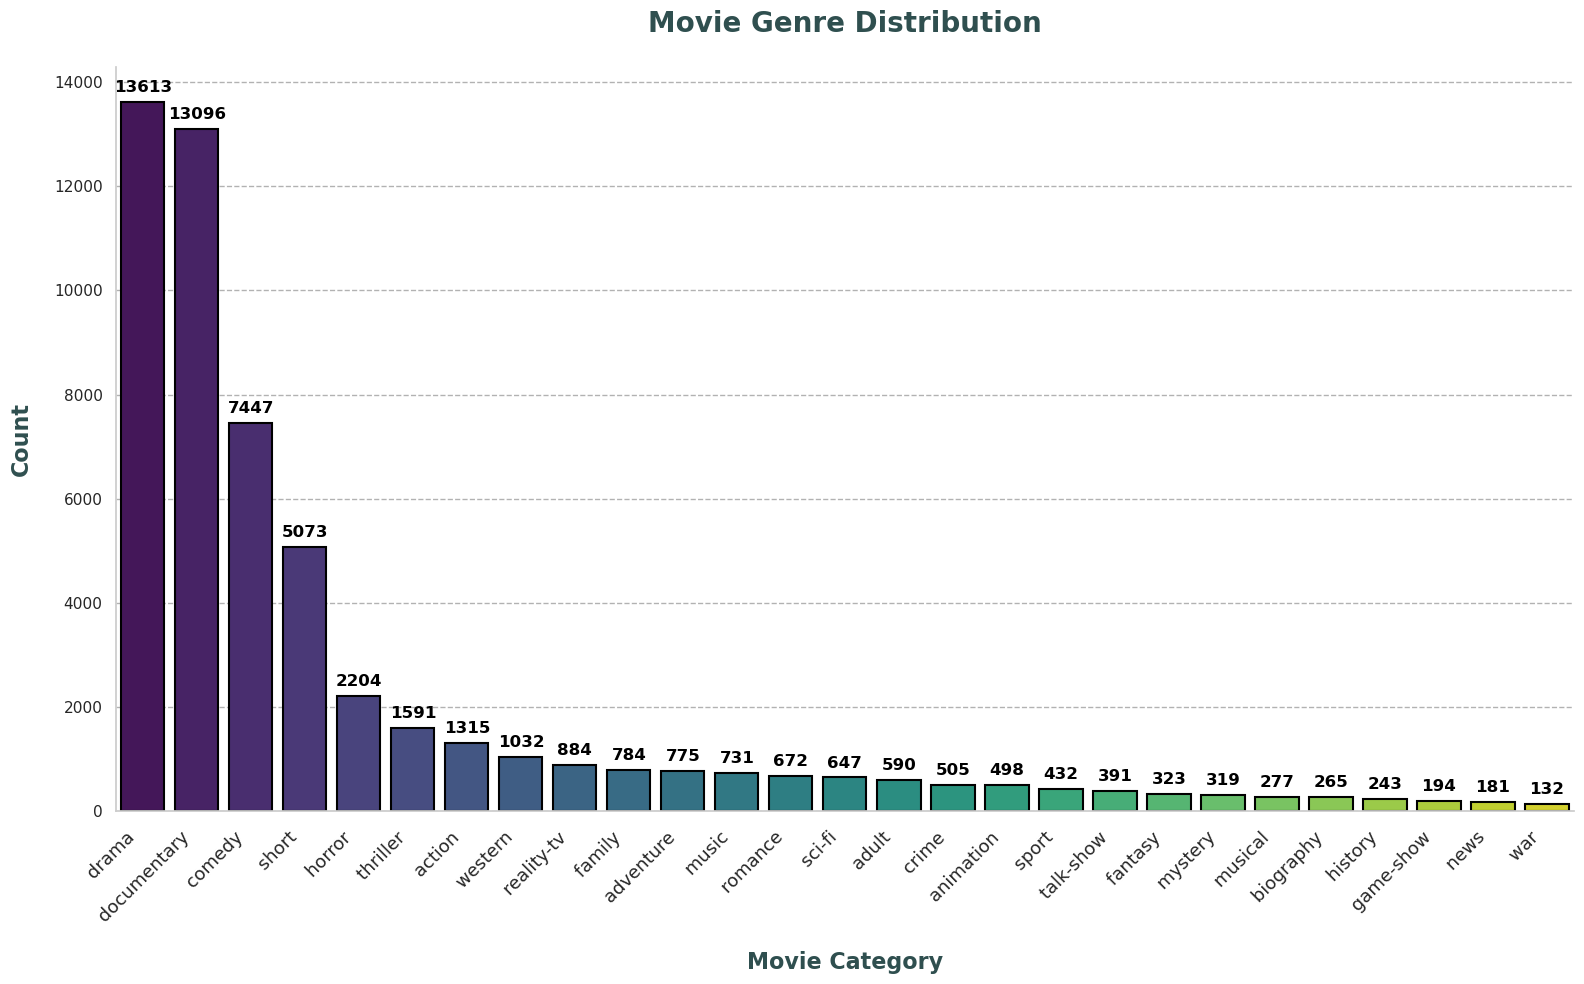

In [9]:
sns.set_theme(style="whitegrid", context="notebook", palette="viridis")  # Changed palette to 'viridis' for a vibrant, colorblind-friendly gradient

# Set figure size (slightly adjusted for better aspect ratio)
plt.figure(figsize=(16, 10))

# Create the count plot with improved parameters
ax = sns.countplot(
    x='GENRE', 
    data=train_data, 
    order=train_data['GENRE'].value_counts().index,  # Sorting by count
    palette="viridis",  # Different color palette: sequential and visually appealing
    edgecolor='black',  # Add borders to bars
    linewidth=1.5,  # Slightly thinner borders for a cleaner look
    saturation=0.8  # Reduce saturation for a softer appearance
)

# Customize labels and title with enhanced styling
plt.xlabel('Movie Category', fontsize=16, fontweight='bold', color='#2F4F4F', labelpad=15)
plt.ylabel('Count', fontsize=16, fontweight='bold', color='#2F4F4F', labelpad=15)
plt.title('Movie Genre Distribution', fontsize=20, fontweight='bold', color='#2F4F4F', pad=25)

# Rotate x-axis labels and adjust font
plt.xticks(rotation=45, ha='right', fontsize=13, fontweight='medium')

# Add subtle gridlines
plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.6, color='gray')

# Remove top and right spines for a clean look
sns.despine()

# Add value labels on top of each bar for better readability
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Display the count
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top center
        ha='center', va='bottom',  # Alignment
        fontsize=12, fontweight='bold', color='black',  # Styling
        xytext=(0, 5), textcoords='offset points'  # Slight offset
    )

# Display the plot
# Tight layout to prevent clipping
plt.tight_layout()
# Display the plot
plt.show()

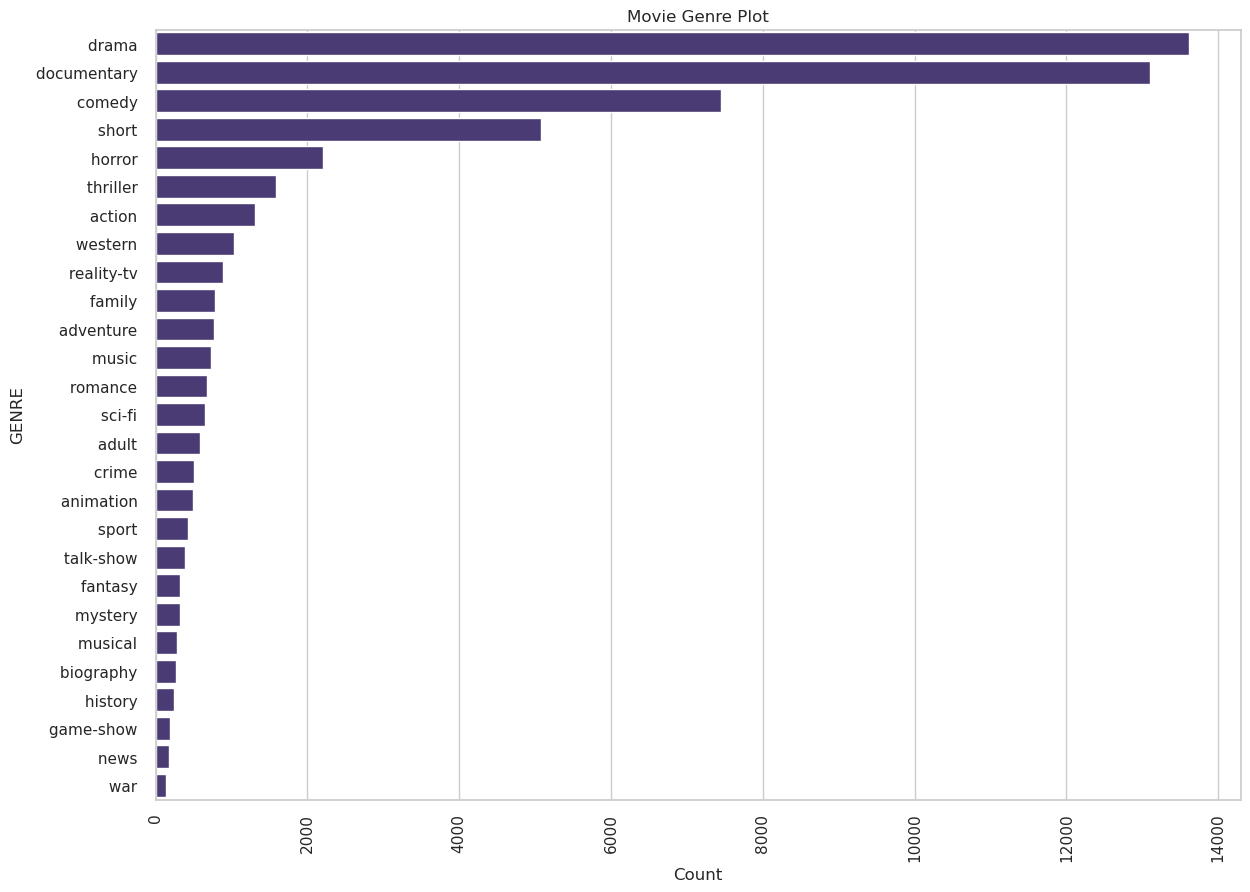

In [68]:
plt.figure(figsize=(14, 10))
count1 = train_data['GENRE'].value_counts()

# Seaborn barplot expects 'x' for values and 'y' for categories
sns.barplot(x=count1.values, y=count1.index, orient='h')

plt.xlabel('Count')
plt.ylabel('GENRE')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

In [84]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)              # Remove @mentions
    text = re.sub(r'http\S+', '', text)           # Remove URLs
    text = re.sub(r'pic\.twitter\.com/\S+', '', text)  # Remove Twitter pic links
    text = re.sub(r'[^a-z\s]', '', text)          # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()      # Remove extra spaces

    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]

    return " ".join(words)

In [11]:
data_combined = pd.concat([train_data, test_data],axis = 0)

In [12]:
data_combined.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [87]:
data_combined.count()

ID             108414
TITLE          108414
GENRE          108414
DESCRIPTION    108414
dtype: int64

In [13]:
encoder = LabelEncoder()
data_combined["GENRE"] = encoder.fit_transform(data_combined["GENRE"])

In [14]:
encoder = LabelEncoder()
data_combined["GENRE"] = encoder.fit_transform(data_combined["TITLE"])

In [16]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION,TextCleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent yearold oscar lea...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer unrecov bodi ground zero also ...


In [25]:
train_data['length'] = train_data['DESCRIPTION'].apply(len)
train_data.head()

,TITLE,GENRE,DESCRIPTION,TextCleaning,length
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent yearold oscar lea...,546
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...,184
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...,650
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...,1082
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer unrecov bodi ground zero also ...,625


In [81]:
test_data['TextCleaning'] = test_data['DESCRIPTION'].apply(cleaning_data)
test_data.head()

,ID,TITLE,DESCRIPTION,TextCleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane love life car apart job especi girlfrien...
1,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughti child three belong w...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin famili shepherd north tran...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die hasnt spoken brother year seriou ca...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known intern martial art superstar bruce lee a...


In [80]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


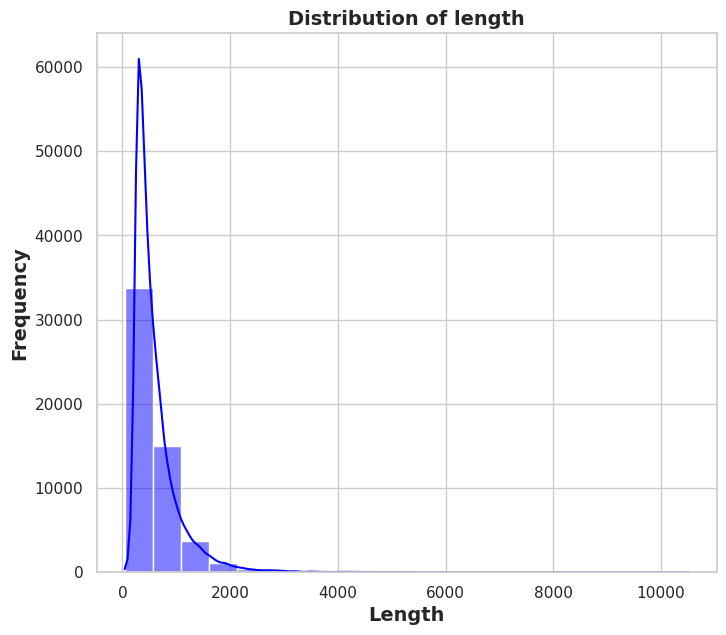

In [26]:
plt.figure(figsize = (8,7))
sns.histplot(data = train_data, x = 'length', bins = 20, kde = True, color = 'blue')
plt.xlabel('Length', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.title('Distribution of length', fontsize = 14, fontweight = 'bold')
plt.show()

In [60]:
# Step 1: Instantiate and fit the Tokenizer
num_words = 50000
vocab_size = 10000  # Adjust as needed (e.g., based on your dataset's vocabulary)
tokenizer = Tokenizer(num_words = num_words, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower = True)
tokenizer.fit_on_texts(train_data['TextCleaning'].values)  # Fit on training text

<>:4: SyntaxWarning: invalid escape sequence '\]'
<>:4: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipykernel_2489/2739419632.py:4: SyntaxWarning: invalid escape sequence '\]'
  tokenizer = Tokenizer(num_words = num_words, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower = True)


In [63]:
test_path = pd.read_csv('Genre Classification Dataset_test_data_solution.txt', sep=':::', header=None, names=['ID', 'TITLE', 'GENRE'], engine='python', encoding='latin-1')

test_path.head()

,ID,TITLE,GENRE
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papÃ¡ (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [64]:
max_len = 100
# Step 2: Convert texts to sequences
X = tokenizer.texts_to_sequences(train_data['TextCleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['GENRE']).values  # Ensure 'GENRE' has no leading spaces

In [65]:
# Step 3: Convert texts to sequences
X_test = tokenizer.texts_to_sequences(train_data['TextCleaning'].values)
X_test = pad_sequences(X, maxlen=max_len)
y_test = pd.get_dummies(train_data['GENRE']).values  # Ensure 'GENRE' has no leading spaces

In [85]:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['TextCleaning'])
X_test = tfidf_vectorizer.transform(test_data['TextCleaning'])

In [86]:
X = X_train
y = train_data['GENRE']

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression

In [91]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

/home/hp/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [92]:
model1.score(X_train, y_train)*100,model1.score(X_train,y_train)*100

(70.44338382790343, 70.44338382790343)

SVM

In [ ]:
model2 = SVC()
model2.fit(X_train, y_train)

In [ ]:
model2.score(X_train, y_train)*100,model2.score(X_train,y_train)*100

GaussianNB

In [ ]:
model3 = GaussianNB()
model3.fit(X_train, y_train)

In [ ]:
model3.score(X_train, y_train)*100,model3.score(X_train,y_train)*100

MultinomialNB

In [ ]:
model4 = MultinomialNB()
model4.fit(X_train, y_train)

In [ ]:
model4.score(X_train, y_train)*100,model4.score(X_train,y_train)*100

VotingClassifier

In [ ]:
model_list = [('LogisticRegression',LogisticRegression()),('SVC',SVC()),('GaussianNB',GaussianNB())]

In [ ]:
main_model = VotingClassifier(model_list, weights = [10,5])
main_model.fit(X_train, y_train)

In [ ]:
main_model.score(X_train, y_train)*100,main_model.score(X_train,y_train)*100

mean_squared_error,mean_absolute_error,mean_squared_error

In [ ]:
print(mean_squared_error(y_test, main_model.predict(x_test)))
print(mean_absolute_error(y_test, main_model.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, main_model.predict(x_test))))

confusion_matrix

In [ ]:
y_pred = main_model.predict(X_test)

In [ ]:
cf = confusion_matrix(Y_test, y_pred)

In [ ]:
sns.heatmap(cf, annot = True)
plt.show()